# EDA on Split data

In [2]:
import pandas as pd
import numpy as np

In [4]:
path = "/Users/tarunshyam/Learning/NASA_Battery_data/Randomized Battery Usage/DataSet/3_Processed/subgroups.csv"
split = pd.read_csv(path)

In [5]:
print(split.dtypes)

type              object
relative_time    float64
voltage          float64
current          float64
temperature      float64
source_file       object
subgroup          object
dtype: object


In [6]:
print("Files loaded from:", split['source_file'].nunique(), "files")

Files loaded from: 8 files


In [7]:
print(split['subgroup'].value_counts())

subgroup
Battery_Uniform_Distribution_Variable_Charge_Room_Temp_DataSet_2Post    11599924
Battery_Uniform_Distribution_Discharge_Room_Temp_DataSet_2Post          10371782
Name: count, dtype: int64


In [8]:
print(split['source_file'].value_counts())

source_file
RW3.mat    3005966
RW1.mat    2958752
RW7.mat    2943960
RW2.mat    2895612
RW5.mat    2857769
RW8.mat    2801600
RW4.mat    2752819
RW6.mat    1755228
Name: count, dtype: int64


In [9]:
print(split['type'].value_counts())

type
D    12694130
C     6394215
R     2883361
Name: count, dtype: int64


In [10]:
print(split.describe())

       relative_time       voltage       current   temperature
count   2.197171e+07  2.197171e+07  2.197171e+07  2.197171e+07
mean    3.661847e+03  3.793164e+00  9.854568e-01 -8.710963e+02
std     1.531765e+04  3.168789e-01  1.414922e+00  1.701516e+03
min     1.000000e-02  3.091000e+00 -2.197000e+00 -4.094098e+03
25%     1.220400e+02  3.535000e+00 -2.500000e-02  2.018018e+01
50%     2.550400e+02  3.768000e+00  5.000000e-01  2.530720e+01
75%     2.080020e+03  4.200000e+00  2.000000e+00  3.095987e+01
max     1.912716e+05  4.380000e+00  4.188000e+00  5.095663e+01


In [11]:
print("Missing values:\n", split.isnull().sum())

Missing values:
 type             0
relative_time    0
voltage          0
current          0
temperature      0
source_file      0
subgroup         0
dtype: int64


In [12]:
print("\nUnique values per column:\n", split.nunique())


Unique values per column:
 type                 3
relative_time    47631
voltage           1051
current           3430
temperature      37250
source_file          8
subgroup             2
dtype: int64


In [13]:
agg = split.groupby('source_file')[['voltage', 'current', 'temperature']].agg(['mean', 'std', 'min', 'max', 'count'])
print(agg.head())

              voltage                                    current            \
                 mean       std    min    max    count      mean       std   
source_file                                                                  
RW1.mat      3.763927  0.316359  3.091  4.209  2958752  1.054728  1.445224   
RW2.mat      3.767899  0.313968  3.189  4.380  2895612  1.036350  1.426733   
RW3.mat      3.812919  0.313811  3.188  4.206  3005966  0.951357  1.394182   
RW4.mat      3.838824  0.318966  3.190  4.205  2752819  0.891805  1.382655   
RW5.mat      3.827605  0.317231  3.163  4.205  2857769  0.903207  1.371053   

                                    temperature                           \
               min    max    count         mean          std         min   
source_file                                                                
RW1.mat     -2.060  4.175  2958752    26.952248     4.857834    17.06738   
RW2.mat     -2.182  4.188  2895612 -3656.250325  1259.132494 -4093.9270

# Data Visualisation

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

Temperature Distribution

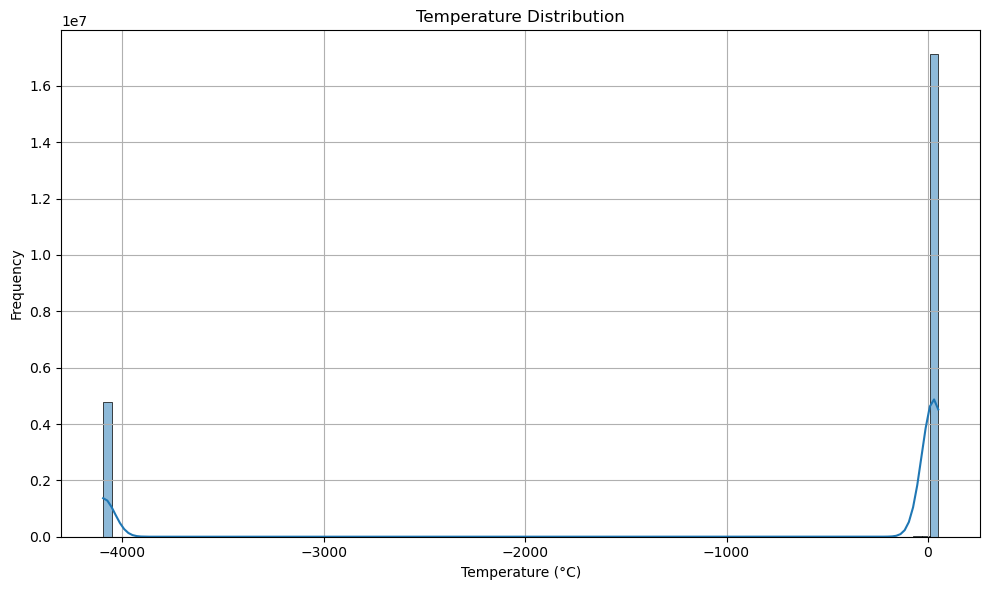

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(split['temperature'], bins=100, kde=True)
plt.title("Temperature Distribution")
plt.xlabel("Temperature (°C)")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()

Voltage vs Relative Time (sampled)

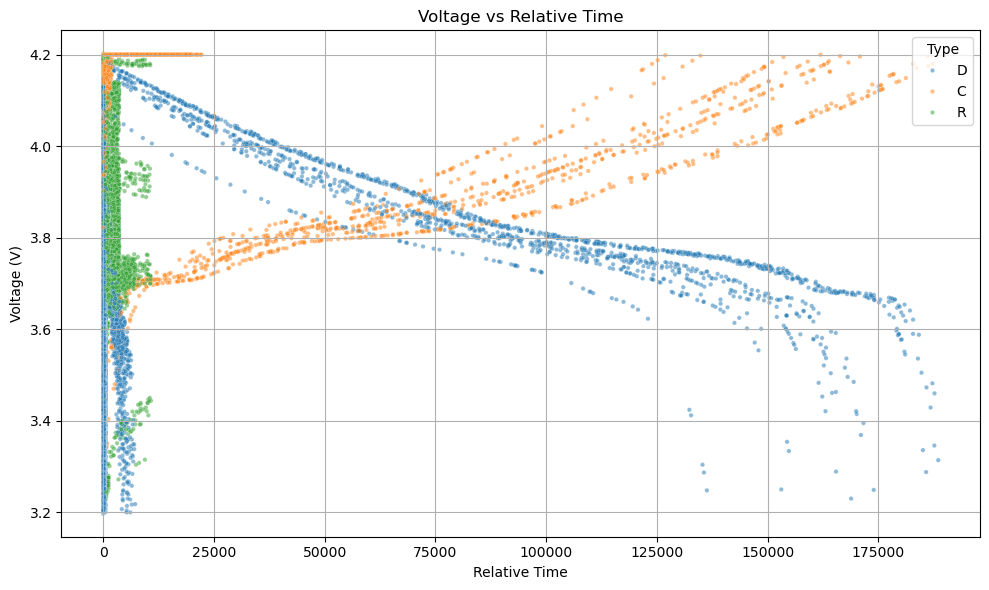

In [16]:
sample_df = split.sample(n=100_000, random_state=1)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=sample_df, x='relative_time', y='voltage', hue='type', alpha=0.5, s=10)
plt.title("Voltage vs Relative Time")
plt.xlabel("Relative Time")
plt.ylabel("Voltage (V)")
plt.legend(title='Type', loc='upper right')
plt.grid(True)
plt.tight_layout()
plt.show()

Current vs Temperature

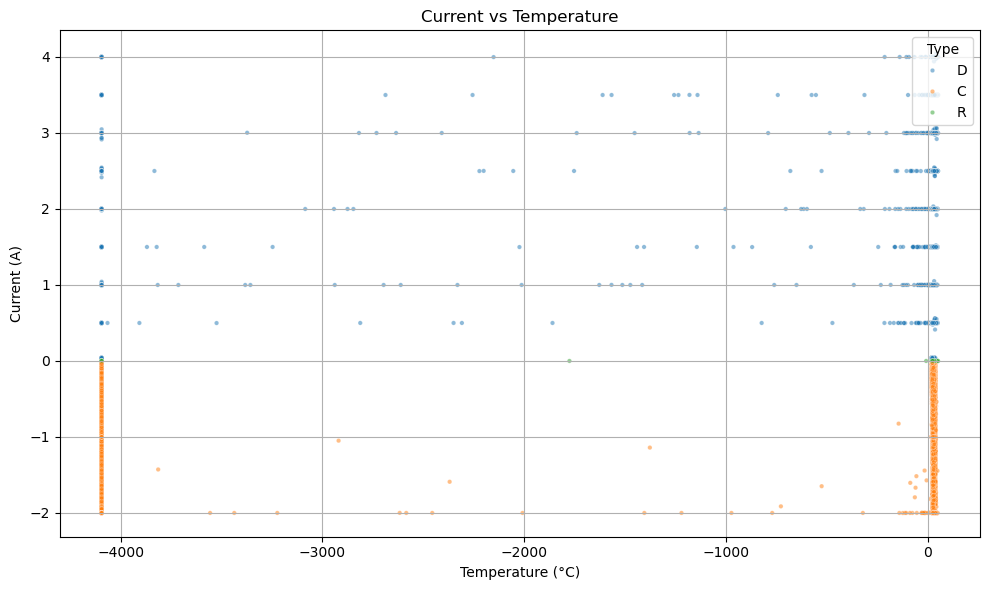

In [17]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=sample_df, x='temperature', y='current', hue='type', alpha=0.5, s=10)
plt.title("Current vs Temperature")
plt.xlabel("Temperature (°C)")
plt.ylabel("Current (A)")
plt.legend(title='Type', loc='upper right')
plt.grid(True)
plt.tight_layout()
plt.show()


Time-Series Trend (Voltage over Time for a Few Batteries)

KeyboardInterrupt: 

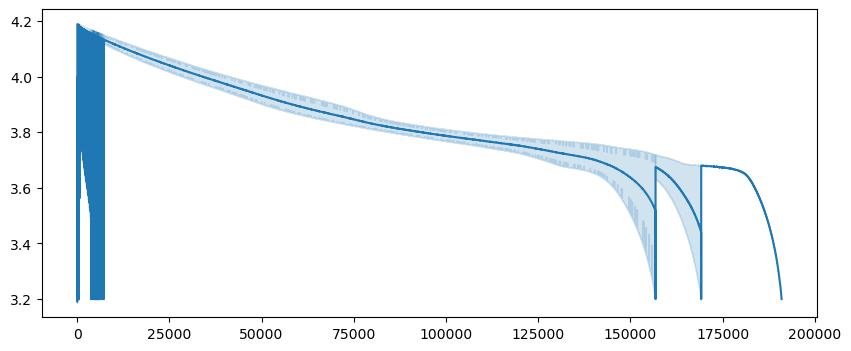

In [18]:
subset_files = split['source_file'].unique()[:3]
for file in subset_files:
    sample = split[split['source_file'] == file]
    plt.figure(figsize=(10, 4))
    sns.lineplot(x='relative_time', y='voltage', data=sample, hue='type')
    plt.title(f"Voltage vs Relative Time for {file}")
    plt.xlabel("Relative Time (s)")
    plt.ylabel("Voltage (V)")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

Voltage/Current/Temp Distribution by type

/var/folders/5z/w106k2293m95fljl_vr_1jhr0000gn/T/ipykernel_18746/732531468.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='type', y=col, data=split, palette='Set2', width=0.5, fliersize=2)


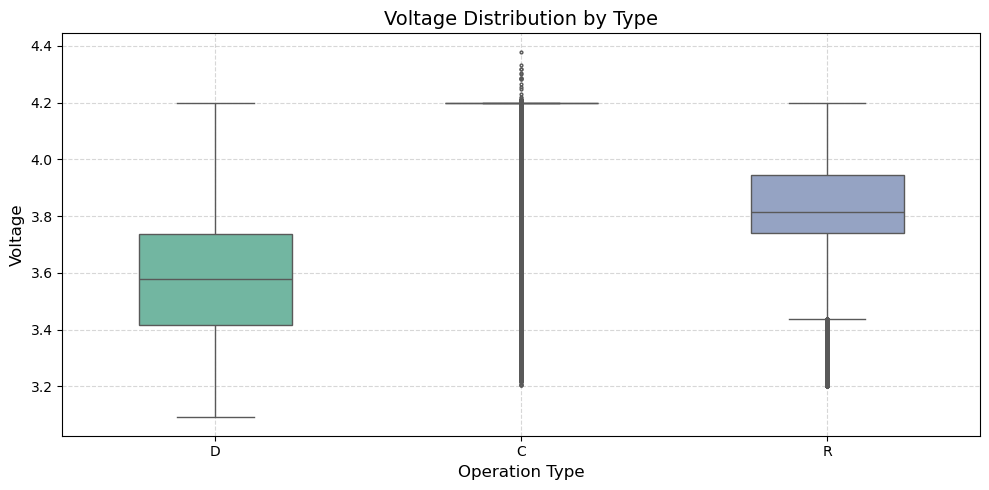

/var/folders/5z/w106k2293m95fljl_vr_1jhr0000gn/T/ipykernel_18746/732531468.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='type', y=col, data=split, palette='Set2', width=0.5, fliersize=2)


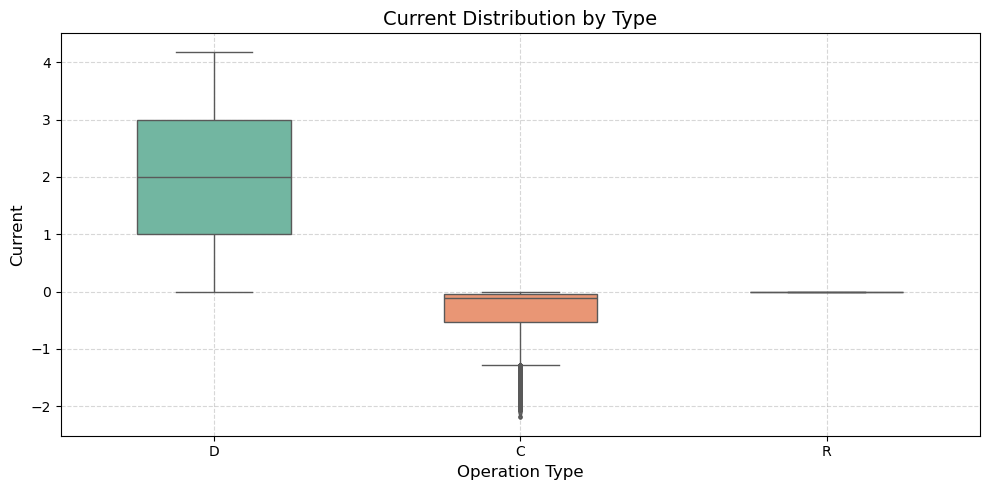

/var/folders/5z/w106k2293m95fljl_vr_1jhr0000gn/T/ipykernel_18746/732531468.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='type', y=col, data=split, palette='Set2', width=0.5, fliersize=2)


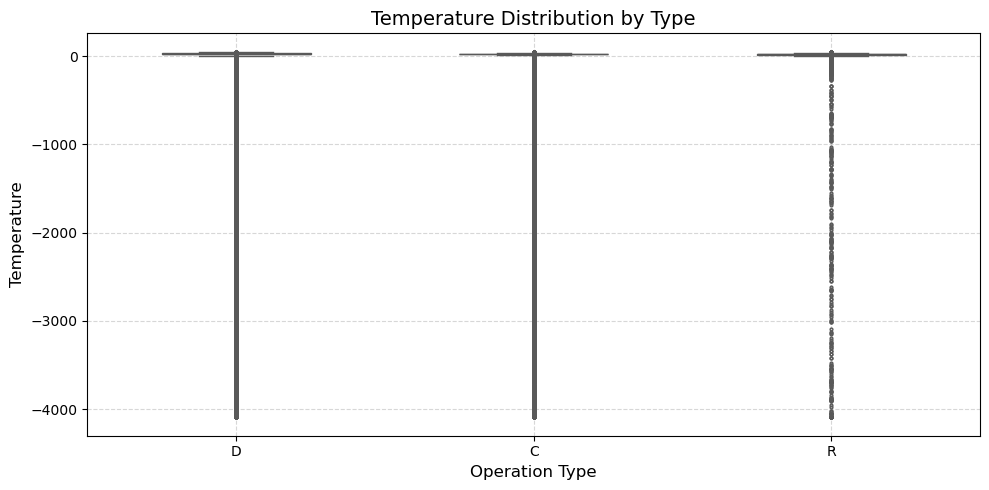

In [23]:
for col in ['voltage', 'current', 'temperature']:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x='type', y=col, data=split, palette='Set2', width=0.5, fliersize=2)
    plt.title(f"{col.capitalize()} Distribution by Type", fontsize=14)
    plt.xlabel("Operation Type", fontsize=12)
    plt.ylabel(f"{col.capitalize()}", fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

Cycle Duration Distribution

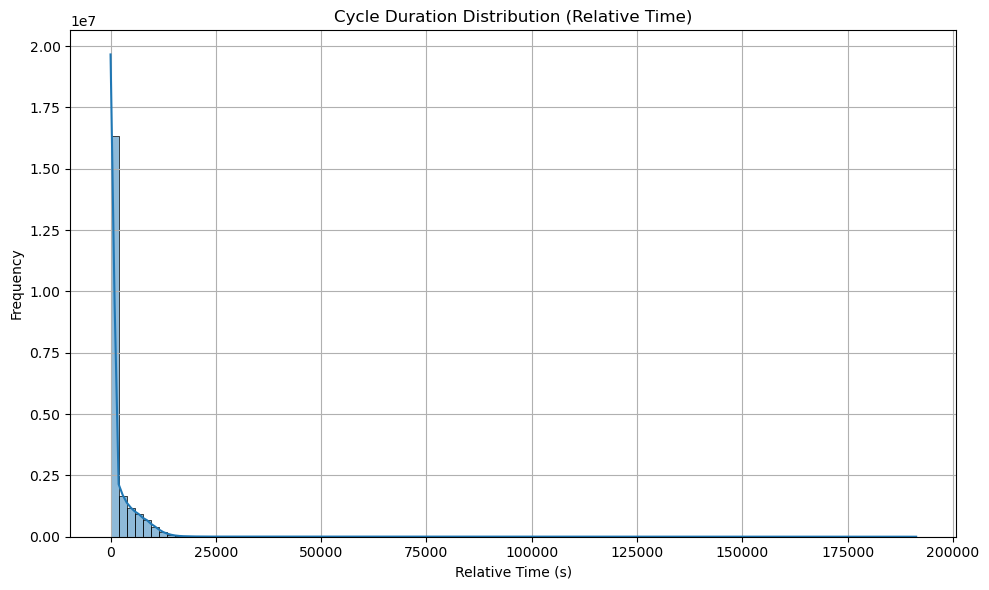

In [21]:
plt.figure(figsize=(10, 6))
sns.histplot(split['relative_time'], bins=100, kde=True)
plt.title("Cycle Duration Distribution (Relative Time)")
plt.xlabel("Relative Time (s)")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()

Power Calculation

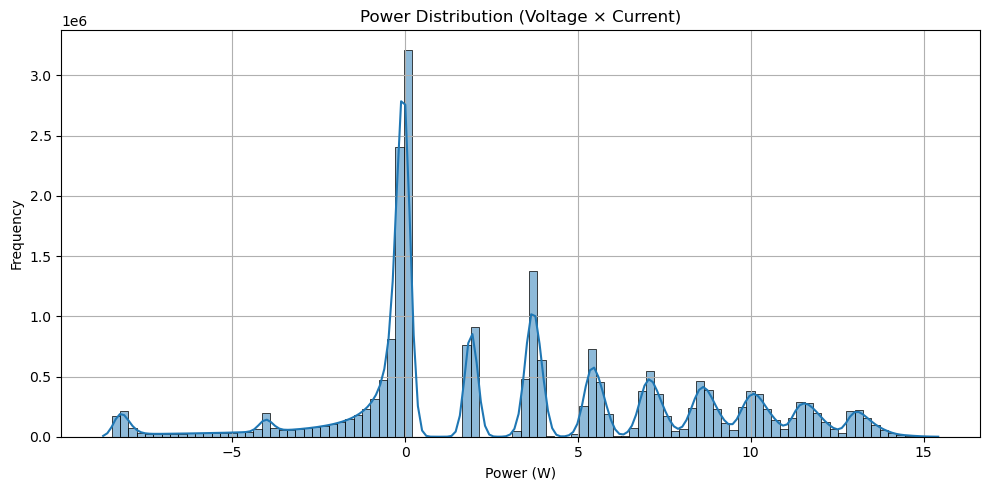

In [22]:
split['power_watts'] = split['voltage'] * split['current']

plt.figure(figsize=(10, 5))
sns.histplot(split['power_watts'], bins=100, kde=True)
plt.title("Power Distribution (Voltage × Current)")
plt.xlabel("Power (W)")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()

# After removing anomalies

In [24]:
file_path = "/Users/tarunshyam/Learning/NASA_Battery_data/Randomized Battery Usage/DataSet/3_Processed/cleaned.csv"
lat = pd.read_csv(file_path)

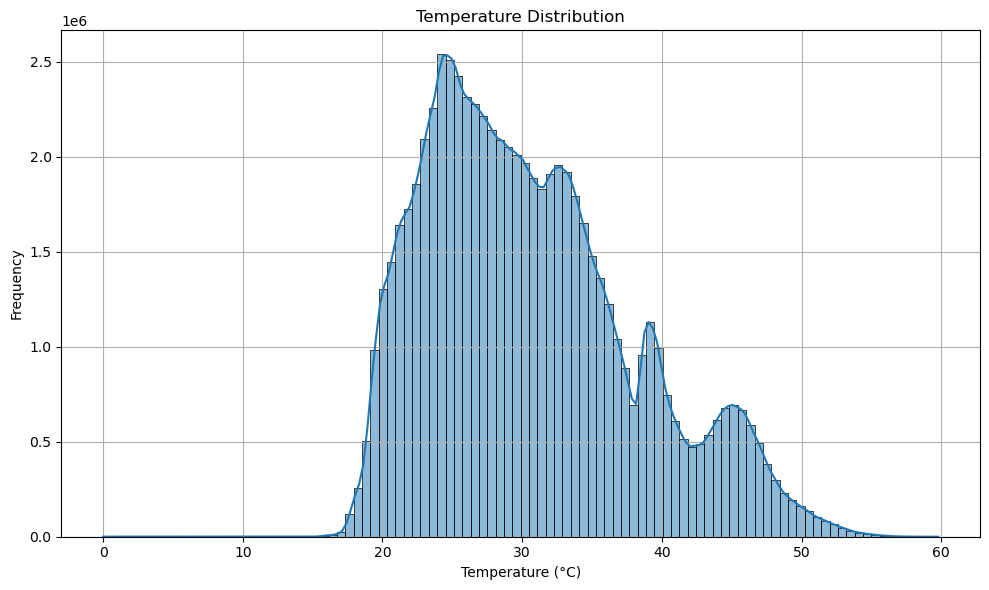

In [25]:
plt.figure(figsize=(10, 6))
sns.histplot(lat['temperature'], bins=100, kde=True)
plt.title("Temperature Distribution")
plt.xlabel("Temperature (°C)")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()

Voltage vs Relative Time (sampled)

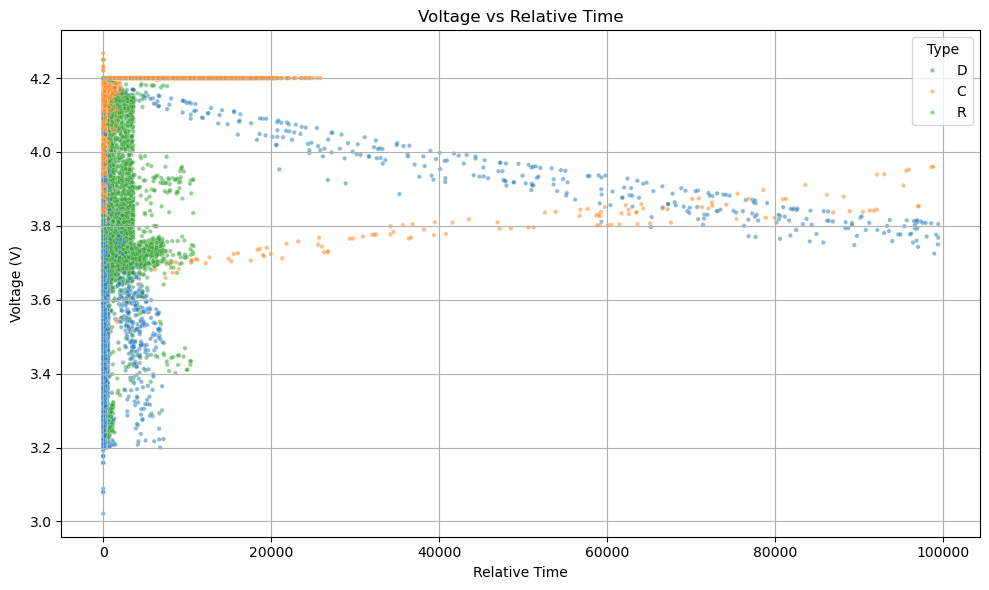

In [26]:
sample_df = lat.sample(n=100_000, random_state=1)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=sample_df, x='relative_time', y='voltage', hue='type', alpha=0.5, s=10)
plt.title("Voltage vs Relative Time")
plt.xlabel("Relative Time")
plt.ylabel("Voltage (V)")
plt.legend(title='Type', loc='upper right')
plt.grid(True)
plt.tight_layout()
plt.show()

Current vs Temperature

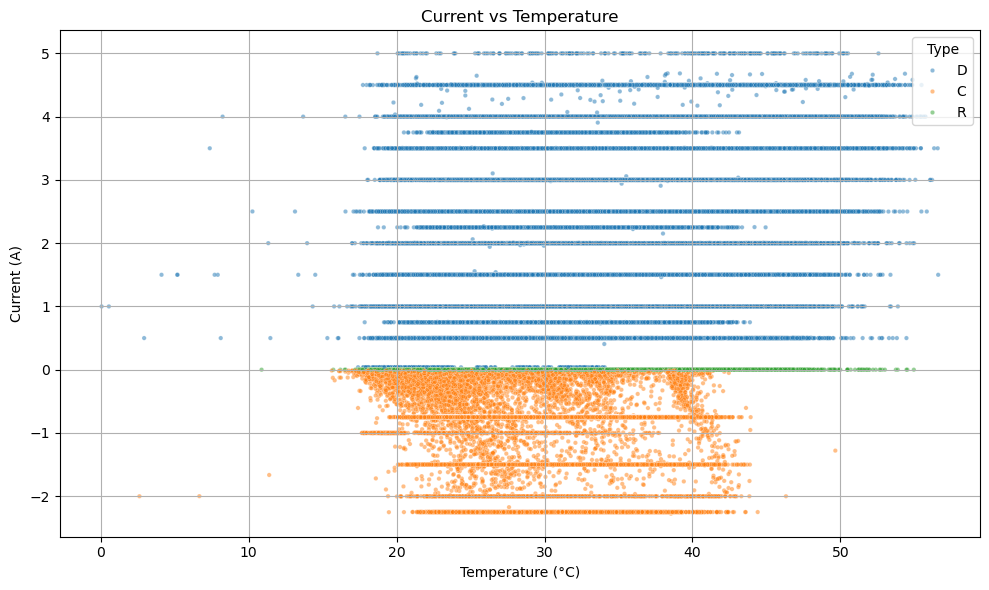

In [27]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=sample_df, x='temperature', y='current', hue='type', alpha=0.5, s=10)
plt.title("Current vs Temperature")
plt.xlabel("Temperature (°C)")
plt.ylabel("Current (A)")
plt.legend(title='Type', loc='upper right')
plt.grid(True)
plt.tight_layout()
plt.show()

Time-Series Trend (Voltage over Time for a Few Batteries)

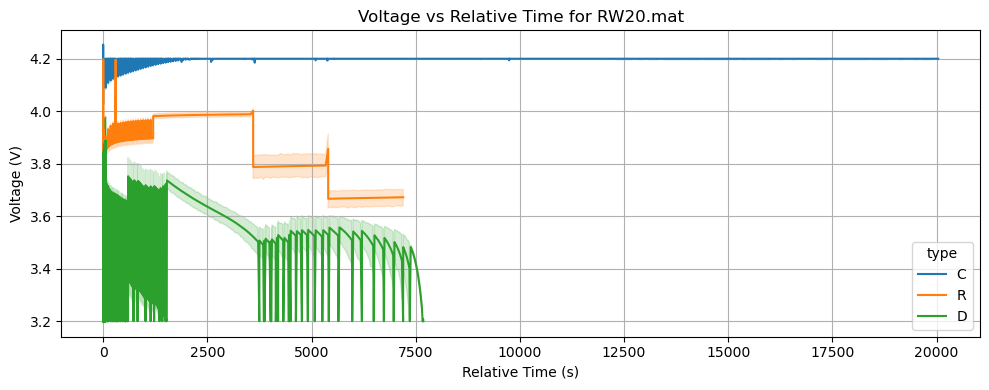

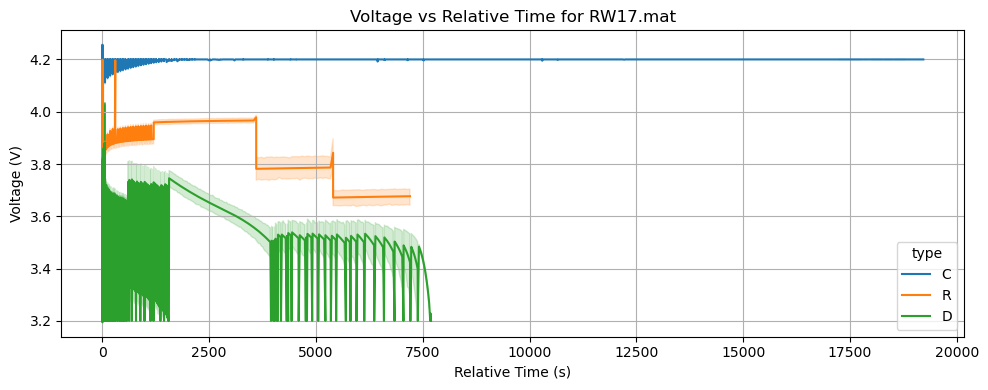

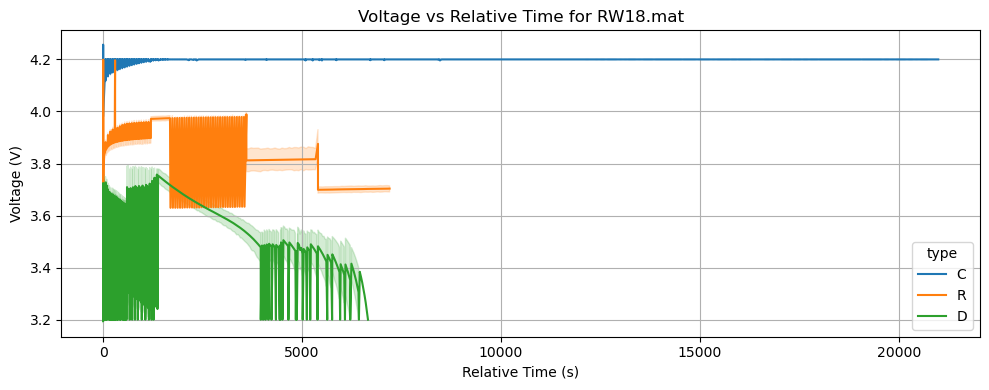

In [28]:
subset_files = lat['source_file'].unique()[:3]  # first 3 files
for file in subset_files:
    sample = lat[lat['source_file'] == file]
    plt.figure(figsize=(10, 4))
    sns.lineplot(x='relative_time', y='voltage', data=sample, hue='type')
    plt.title(f"Voltage vs Relative Time for {file}")
    plt.xlabel("Relative Time (s)")
    plt.ylabel("Voltage (V)")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

Voltage/Current/Temp Distribution by type

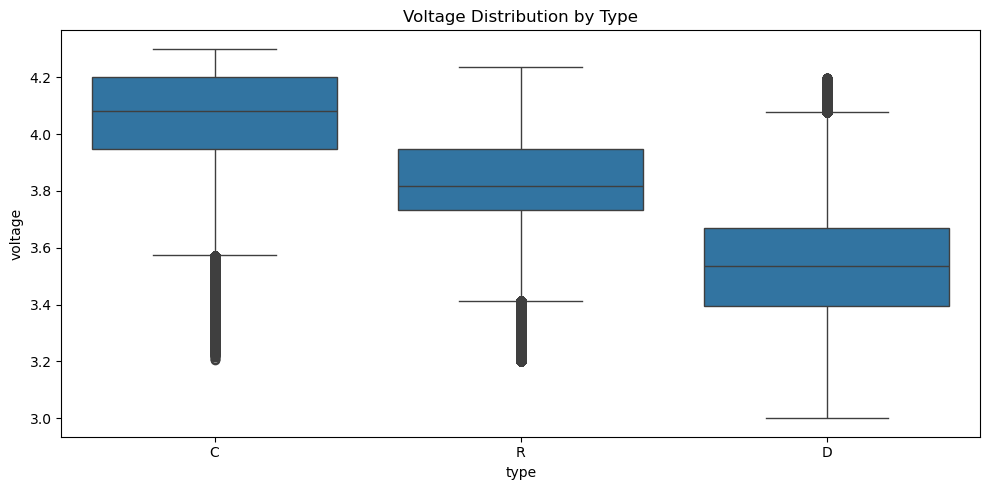

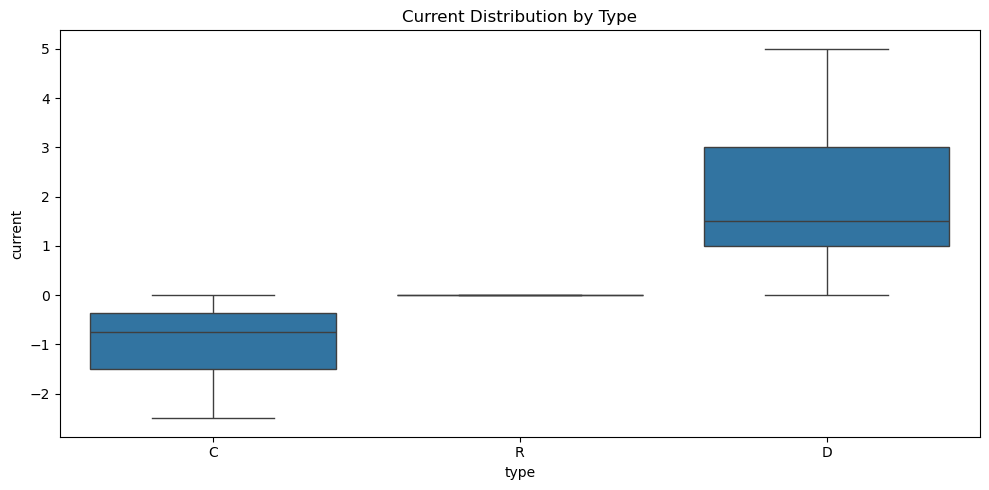

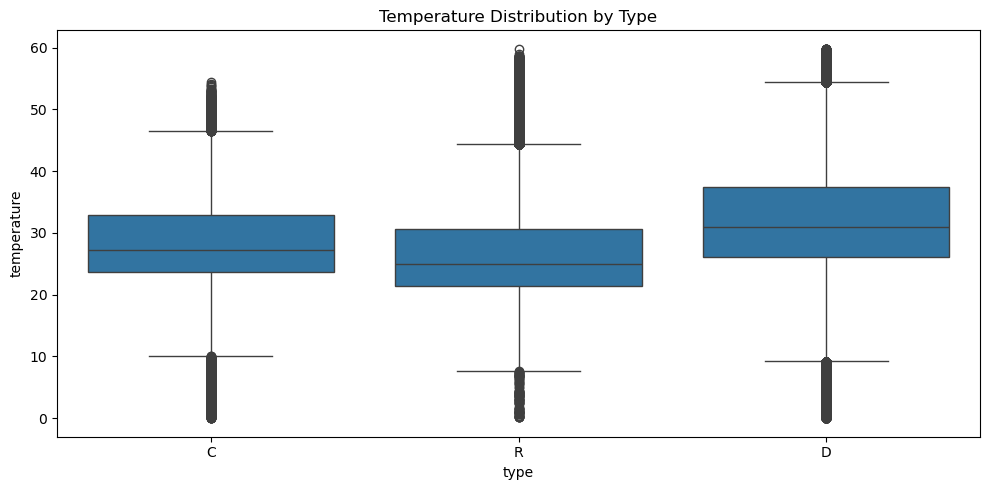

In [29]:
for col in ['voltage', 'current', 'temperature']:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x='type', y=col, data=lat)
    plt.title(f"{col.capitalize()} Distribution by Type")
    plt.tight_layout()
    plt.show()

Cycle Duration Distribution

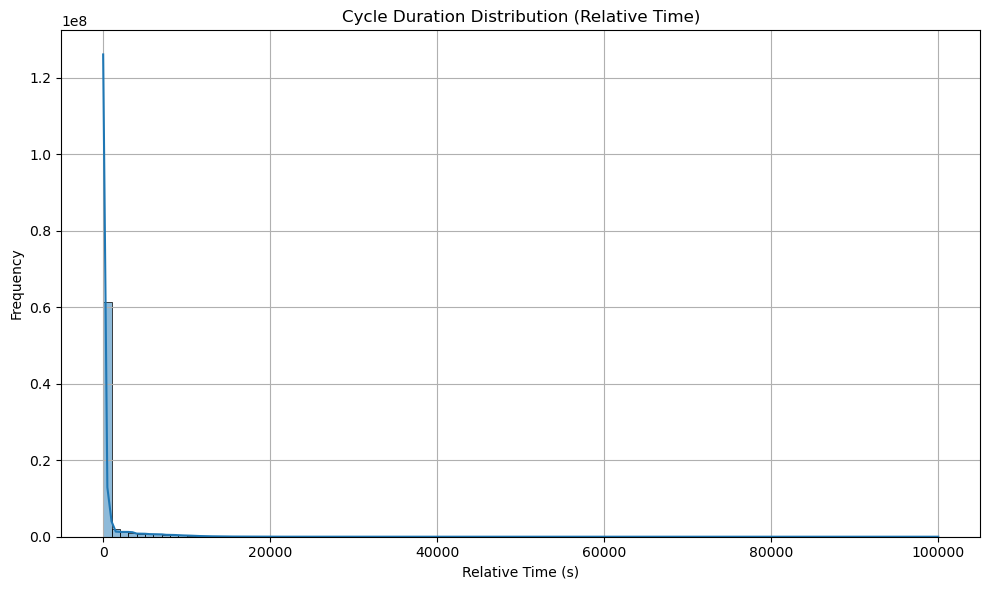

In [30]:
plt.figure(figsize=(10, 6))
sns.histplot(lat['relative_time'], bins=100, kde=True)
plt.title("Cycle Duration Distribution (Relative Time)")
plt.xlabel("Relative Time (s)")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()

Power Calculation

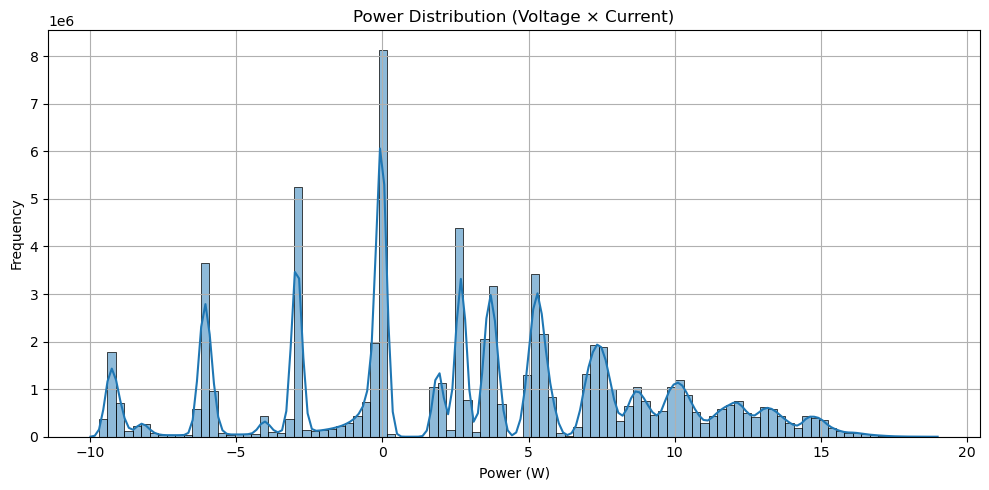

In [31]:
lat['power_watts'] = lat['voltage'] * lat['current']

plt.figure(figsize=(10, 5))
sns.histplot(lat['power_watts'], bins=100, kde=True)
plt.title("Power Distribution (Voltage × Current)")
plt.xlabel("Power (W)")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()